In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import time
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)


We now have objpoints and imgpoints needed for camera calibration. We will run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image.

Text(0.5,1,'Undistorted Image')

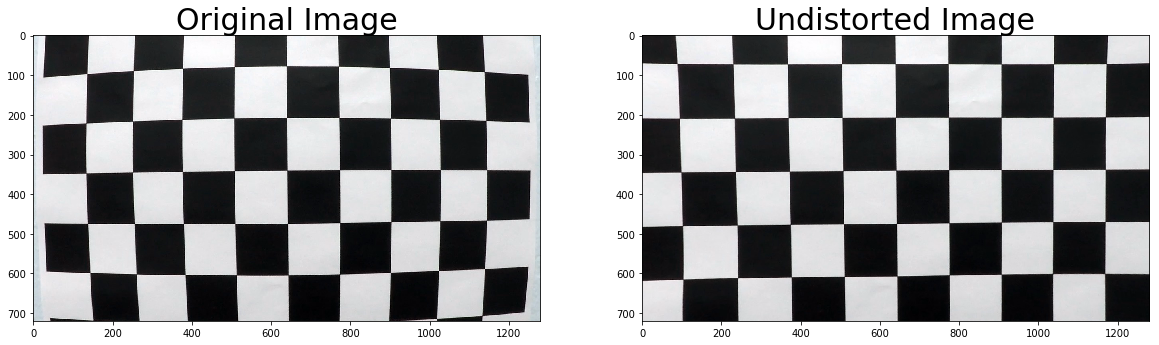

In [3]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('../camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('../output_images/chessboard_images/test_undistort_Cal1.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "../camera_cal/dist_pickle.p", "wb" ) )

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# imgtest = cv2.imread('../test_images/test1.jpg')
# test = cv2.undistort(imgtest, mtx, dist, None, mtx)
# plt.imshow(test)

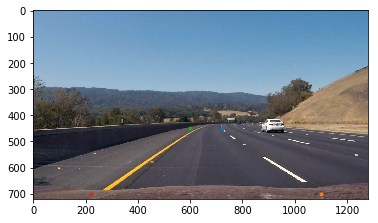

In [4]:
import matplotlib.image as mpimg

image_coord = mpimg.imread('../test_images/test3.jpg')
plt.imshow(image_coord)

plt.plot(720,450,'.') # top-right
plt.plot(1100,700,'.') # bottom-right
plt.plot(600,450,'.') # top-left
plt.plot(220,700,'.') # bottom-left


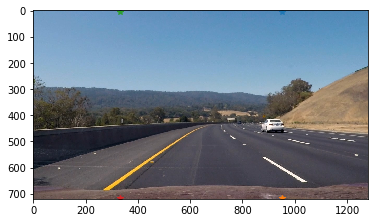

In [5]:
import matplotlib.image as mpimg

image_coord = mpimg.imread('../test_images/test3.jpg')
plt.imshow(image_coord)

plt.plot(950,5,'*') # top-right
plt.plot(950,715,'*') # bottom-right
plt.plot(330,5,'*') # top-left
plt.plot(330,715,'*') # bottom-left

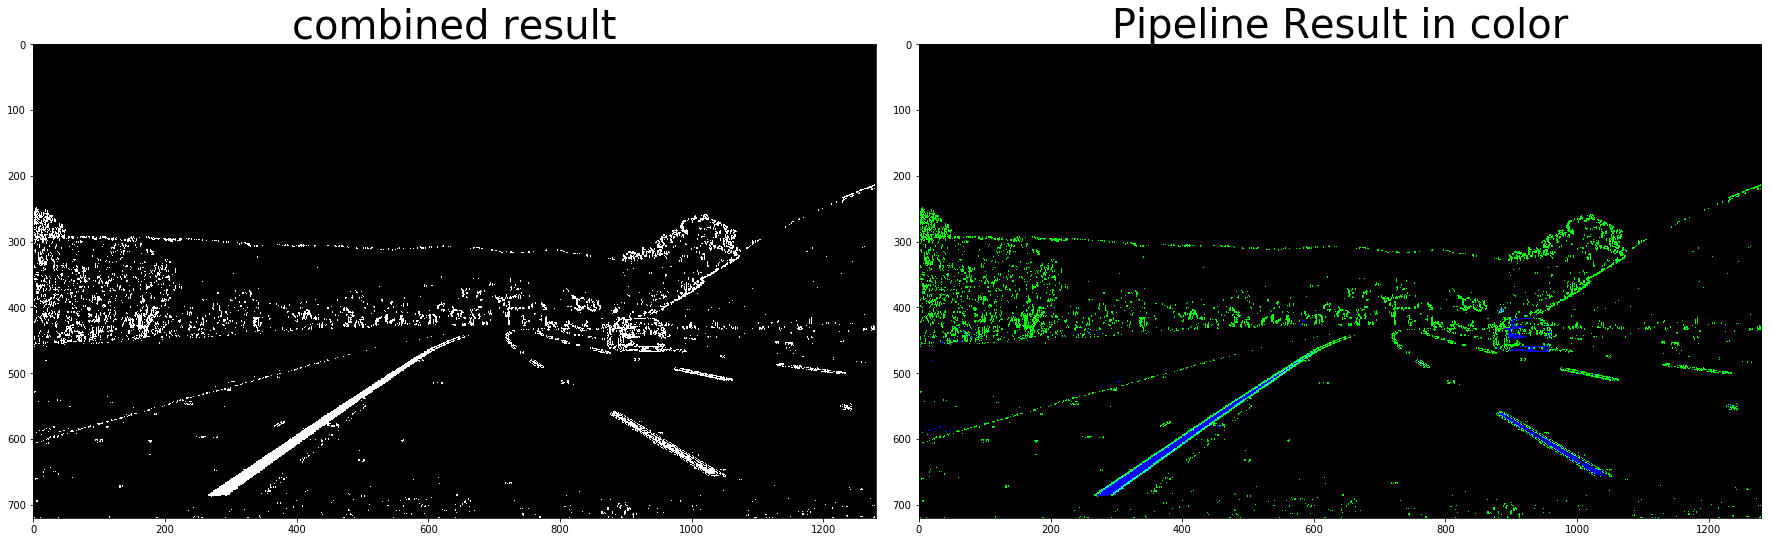

In [6]:
image = mpimg.imread('../test_images/test3.jpg')

    # def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    #     # Convert to grayscale
    #     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #     # Apply x or y gradient with the OpenCV Sobel() function
    #     # and take the absolute value
    #     if orient == 'x':
    #         abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    #     if orient == 'y':
    #         abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    #     # Rescale back to 8 bit integer
    #     scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    #     # Create a copy and apply the threshold
    #     binary_output = np.zeros_like(scaled_sobel)
    #     # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    #     binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    #     # Return the result
    #     return binary_output

    # def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    #     # Convert to grayscale
    #     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #     # Take both Sobel x and y gradients
    #     sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    #     sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    #     # Calculate the gradient magnitude
    #     gradmag = np.sqrt(sobelx**2 + sobely**2)
    #     # Rescale to 8 bit
    #     scale_factor = np.max(gradmag)/255 
    #     gradmag = (gradmag/scale_factor).astype(np.uint8) 
    #     # Create a binary image of ones where threshold is met, zeros otherwise
    #     binary_output = np.zeros_like(gradmag)
    #     binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    #     # Return the binary image
    #     return binary_output

    # def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    #     # Grayscale
    #     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #     # Calculate the x and y gradients
    #     sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    #     sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    #     # Take the absolute value of the gradient direction, 
    #     # apply a threshold, and create a binary image result
    #     absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    #     binary_output =  np.zeros_like(absgraddir)
    #     binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    #     # Return the binary image
    #     return binary_output


# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(150, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    
    #     # Choose a Sobel kernel size
    #     ksize = 3 # Choose a larger odd number to smooth gradient measurements
    #     # Apply each of the thresholding functions
    #     gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=(sx_thresh[0], sx_thresh[1]))
    #     grady = abs_sobel_thresh(img, orient='y', sobel_kernel=ksize, thresh=(sx_thresh[0], sx_thresh[1]))
    #     mag_binary = mag_thresh(img, sobel_kernel=ksize, mag_thresh=(30, 100))
    #     dir_binary = dir_threshold(img, sobel_kernel=ksize, thresh=(0.7, 1.3))

    #     combined = np.zeros_like(dir_binary)
    #     combined[(gradx == 1) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    return color_binary, combined_binary
    
result_color, combined_result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(combined_result, cmap='gray')
ax1.set_title('combined result', fontsize=40)

ax2.imshow(result_color)
ax2.set_title('Pipeline Result in color', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

True

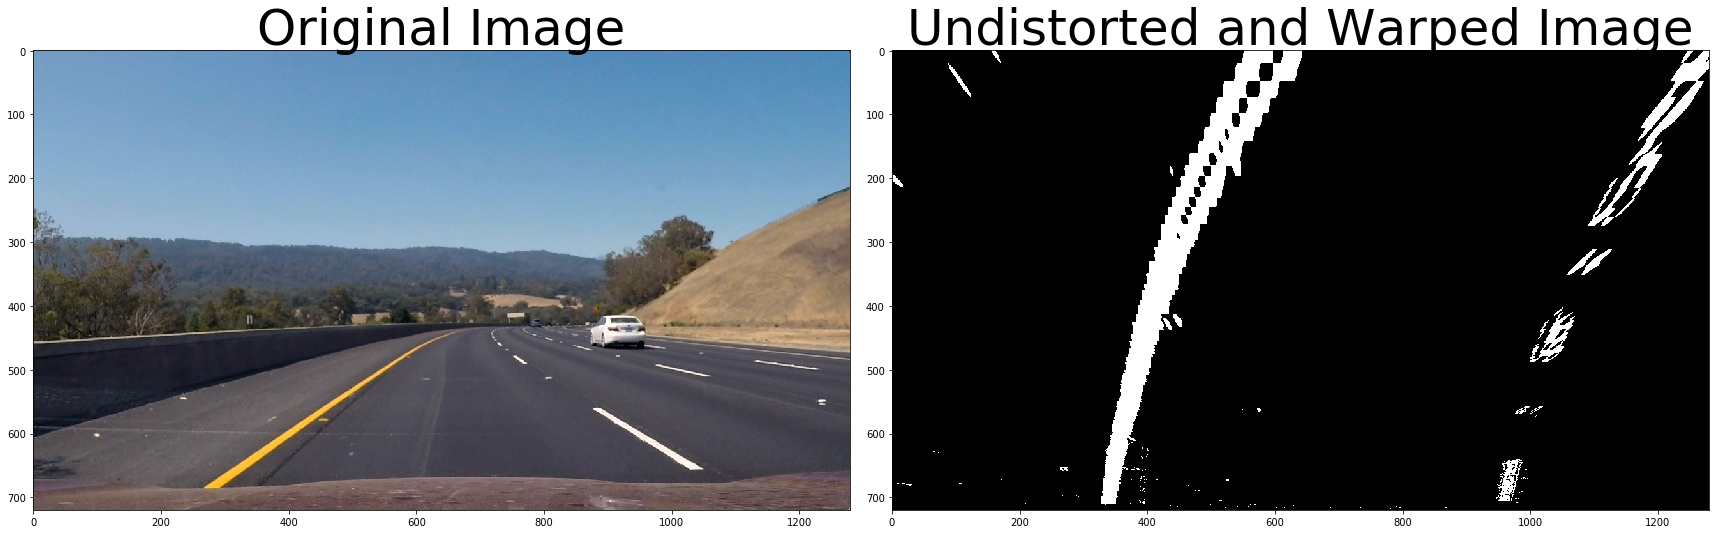

In [7]:
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
dist_pickle = pickle.load( open( "../camera_cal/dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = mpimg.imread('../test_images/test3.jpg')
result_color, thres_result = pipeline(img)

def unwarp(img, mtx, dist):
    # Using the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Grab the image shape
    img_size = (img.shape[1], img.shape[0])
    # For source points I'm grabbing an approximate trapezoid of the lane lines like above graph
    src = np.float32([[680,450], [1100,700], [600,450], [220,720]])
    # For source points I'm grabbing an approximate rectangle of the expected warped lane lines
    dst = np.float32([[950,5], [950,715], [330,5], [330,715]])
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
    
    # Return the resulting image and matrix
    return warped, M

warped, perspective_M = unwarp(thres_result, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Undistorted and Warped Image', fontsize=50)

cv2.imwrite('../output_images/partial_test_images/test3_Undistorted-Warped.jpg',warped)

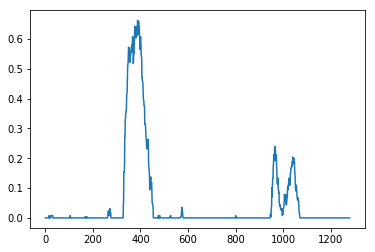

In [8]:
# Load our image
# `mpimg.imread` will load .jpg as 0-255, so normalize back to 0-1
img = mpimg.imread('../output_images/partial_test_images/test3_Undistorted-Warped.jpg')/255

def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = hist(img)

# Visualize the resulting histogram
plt.plot(histogram)

True

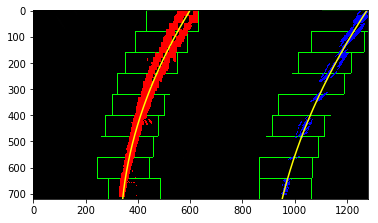

In [9]:
# Load our image
binary_warped = mpimg.imread('../output_images/partial_test_images/test3_Undistorted-Warped.jpg')

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


out_img = fit_polynomial(binary_warped)

plt.imshow(out_img)
cv2.imwrite('../output_images/partial_test_images/test3_polyfitted-Warped.jpg',out_img)